<a href="https://colab.research.google.com/github/Gilbert9172/AI_Project/blob/main/Project_AI_04_%EC%A0%95%EA%B8%B8%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **전처리**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/gdrive/MyDrive/Section1/Project/vgames4.csv', encoding = 'CP949')
df = df.iloc[:,1:]
df.head(12)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
# 각 지역별 출고량 단위 통일 (M)

def k_m(x):
  num = df[x]
  units =  {"K":0.001,"M":1}
  lst = []
  for n in num:
    try:
      lst.append(float(n))
    except:
      unit=n[-1]                         
      n = float(n[:-1])                 
      lst.append(n*units[unit])
  return pd.DataFrame(lst)

df['NA_Sales'] = k_m('NA_Sales')
df['EU_Sales'] = k_m('EU_Sales')
df['JP_Sales'] = k_m('JP_Sales')
df['Other_Sales'] = k_m('Other_Sales')

col = ['Name', 'Platform',	'Year'	,'Genre', 'Publisher', 'NA_Sales (unit:M)',	'EU_Sales (unit:M)',	'JP_Sales (unit:M)'	,'Other_Sales (unit:M)']
df.columns = col
df

,Name,Platform,Year,Genre,Publisher,NA_Sales (unit:M),EU_Sales (unit:M),JP_Sales (unit:M),Other_Sales (unit:M)
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df['Global_Sales (unit:M)'] = df['NA_Sales (unit:M)']+df['EU_Sales (unit:M)']+df['JP_Sales (unit:M)']+df['Other_Sales (unit:M)']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales (unit:M),EU_Sales (unit:M),JP_Sales (unit:M),Other_Sales (unit:M),Global_Sales (unit:M)
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
d_g = df.loc[:,['Name','Global_Sales (unit:M)']]
d_g = d_g.nlargest(10, 'Global_Sales (unit:M)')
d_g.set_index('Name', drop=True, inplace=True)
d_g

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=d_g, y = d_g.index, x = d_g['Global_Sales (unit:M)'], palette='Blues_r')

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.2f "%(width), va='center')

plt.xlabel('Global_Sales (unit:M)',fontsize = 20)
plt.ylabel("Games",fontsize = 20)
plt.xticks(fontsize = 20)
plt.title('< Top 10 > Global Sales amount', fontsize=30)
plt.show();

# **1. 각 지역에 따라서 선호하는 게임 장르가 다른지**

* One way - Anova Test

In [ ]:
# NA
import statsmodels.api as sm
from statsmodels.formula.api import ols
ddf2 = df.loc[:,['Genre', 'NA_Sales (unit:M)']]
ddf2

,Genre,NA_Sales (unit:M)
0,Action,0.04
1,Action,0.17
2,Adventure,0.00
3,Misc,0.04
4,Platform,0.12
...,...,...
16593,Platform,0.15
16594,Action,0.01
16595,Sports,0.44
16596,Action,0.05


In [ ]:
df2_melt = pd.melt(ddf2.reset_index(), id_vars=['Genre'], value_vars=['NA_Sales (unit:M)'])
df2_melt.columns = ['Genre', 'sales', 'value']
df2_melt

,Genre,sales,value
0,Action,NA_Sales (unit:M),0.04
1,Action,NA_Sales (unit:M),0.17
2,Adventure,NA_Sales (unit:M),0.00
3,Misc,NA_Sales (unit:M),0.04
4,Platform,NA_Sales (unit:M),0.12
...,...,...,...
16593,Platform,NA_Sales (unit:M),0.15
16594,Action,NA_Sales (unit:M),0.01
16595,Sports,NA_Sales (unit:M),0.44
16596,Action,NA_Sales (unit:M),0.05


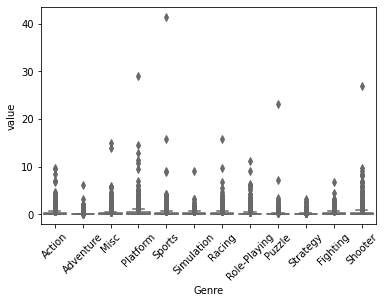

In [ ]:
sns.boxplot(x='Genre', y='value', data=df2_melt, color='#99c2a2')
plt.xticks(rotation = 45)
plt.show();

In [ ]:
# c(비교하고 싶은 집단)
# 종속 변수 ~ C(독립변수)
model = ols('value ~ C(Genre)', data=df2_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genre),165.487555,11.0,22.885433,2.916901e-47
Residual,10870.361520,16536.0,NaN,NaN


In [ ]:
# EU
ddf3 = df.loc[:,['Genre', 'EU_Sales (unit:M)']]
ddf3

,Genre,EU_Sales (unit:M)
0,Action,0.00
1,Action,0.00
2,Adventure,0.00
3,Misc,0.00
4,Platform,0.09
...,...,...
16593,Platform,0.04
16594,Action,0.00
16595,Sports,0.19
16596,Action,0.05


In [ ]:
df3_melt = pd.melt(ddf3.reset_index(), id_vars=['Genre'], value_vars=['EU_Sales (unit:M)'])
df3_melt.columns = ['Genre', 'sales', 'value']
df3_melt

,Genre,sales,value
0,Action,EU_Sales (unit:M),0.00
1,Action,EU_Sales (unit:M),0.00
2,Adventure,EU_Sales (unit:M),0.00
3,Misc,EU_Sales (unit:M),0.00
4,Platform,EU_Sales (unit:M),0.09
...,...,...,...
16593,Platform,EU_Sales (unit:M),0.04
16594,Action,EU_Sales (unit:M),0.00
16595,Sports,EU_Sales (unit:M),0.19
16596,Action,EU_Sales (unit:M),0.05


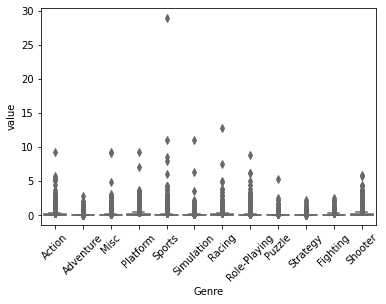

In [ ]:
sns.boxplot(x='Genre', y='value', data=df3_melt, color='#99c2a2')
plt.xticks(rotation = 45)
plt.show();

In [ ]:
# c(비교하고 싶은 집단)
# 종속 변수 ~ C(독립변수)
model = ols('value ~ C(Genre)', data=df3_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genre),41.333566,11.0,14.906687,2.934459e-29
Residual,4168.305270,16536.0,NaN,NaN


In [ ]:
# JP
ddf4 = df.loc[:,['Genre', 'JP_Sales (unit:M)']]
ddf4

,Genre,JP_Sales (unit:M)
0,Action,0.00
1,Action,0.00
2,Adventure,0.02
3,Misc,0.00
4,Platform,0.00
...,...,...
16593,Platform,0.00
16594,Action,0.00
16595,Sports,0.03
16596,Action,0.25


In [ ]:
df4_melt = pd.melt(ddf4.reset_index(), id_vars=['Genre'],value_vars=['JP_Sales (unit:M)'])
df4_melt.columns = ['Genre','sales', 'value']
df4_melt

,Genre,sales,value
0,Action,JP_Sales (unit:M),0.00
1,Action,JP_Sales (unit:M),0.00
2,Adventure,JP_Sales (unit:M),0.02
3,Misc,JP_Sales (unit:M),0.00
4,Platform,JP_Sales (unit:M),0.00
...,...,...,...
16593,Platform,JP_Sales (unit:M),0.00
16594,Action,JP_Sales (unit:M),0.00
16595,Sports,JP_Sales (unit:M),0.03
16596,Action,JP_Sales (unit:M),0.25


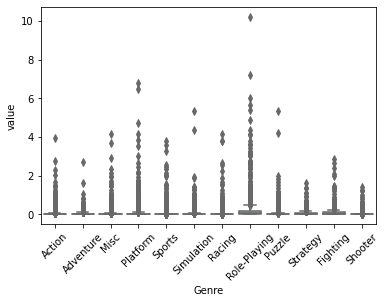

In [ ]:
sns.boxplot(x='Genre', y='value', data=df4_melt, color='#99c2a2')
plt.xticks(rotation = 45)
plt.show();

In [ ]:
# c(비교하고 싶은 집단)
# 종속 변수 ~ C(독립변수)
model = ols('value ~ C(Genre)', data=df4_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genre),51.264852,11.0,51.19818,9.772754e-112
Residual,1505.230340,16536.0,NaN,NaN


In [ ]:
# Others
ddf5 = df.loc[:,['Genre', 'Other_Sales (unit:M)']]
ddf5

,Genre,Other_Sales (unit:M)
0,Action,0.00
1,Action,0.01
2,Adventure,0.00
3,Misc,0.00
4,Platform,0.04
...,...,...
16593,Platform,0.01
16594,Action,0.00
16595,Sports,0.13
16596,Action,0.03


In [ ]:
df5_melt = pd.melt(ddf5.reset_index(), id_vars=['Genre'],value_vars=['Other_Sales (unit:M)'])
df5_melt.columns = ['Genre','sales', 'value']
df5_melt

,Genre,sales,value
0,Action,Other_Sales (unit:M),0.00
1,Action,Other_Sales (unit:M),0.01
2,Adventure,Other_Sales (unit:M),0.00
3,Misc,Other_Sales (unit:M),0.00
4,Platform,Other_Sales (unit:M),0.04
...,...,...,...
16593,Platform,Other_Sales (unit:M),0.01
16594,Action,Other_Sales (unit:M),0.00
16595,Sports,Other_Sales (unit:M),0.13
16596,Action,Other_Sales (unit:M),0.03


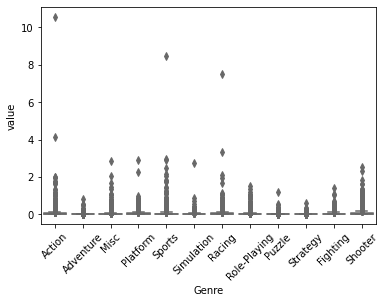

In [ ]:
sns.boxplot(x='Genre', y='value', data=df5_melt, color='#99c2a2')
plt.xticks(rotation = 45)
plt.show();

In [ ]:
# c(비교하고 싶은 집단)
# 종속 변수 ~ C(독립변수)
model = ols('value ~ C(Genre)', data=df5_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genre),4.943261,11.0,12.78941,1.535145e-24
Residual,581.033006,16536.0,NaN,NaN


귀무가설 : 각 지역마다 선호하는 장르의 평균(분산)은 차이가 없다.

대립가서 : 각 지역마다 선호하는 장르의 평균(분산)은 차이가 있다.

* 각 지역 검정 결과, p값이 0에 수렴했기 때문에 귀무가설 기각.
따라서 각 지역마다 선호하는 장르의 평균은 통계적으로 유의하다. 


# **1-1. 지역별 게임 장르**
* 시각화를 통한 사후 검정

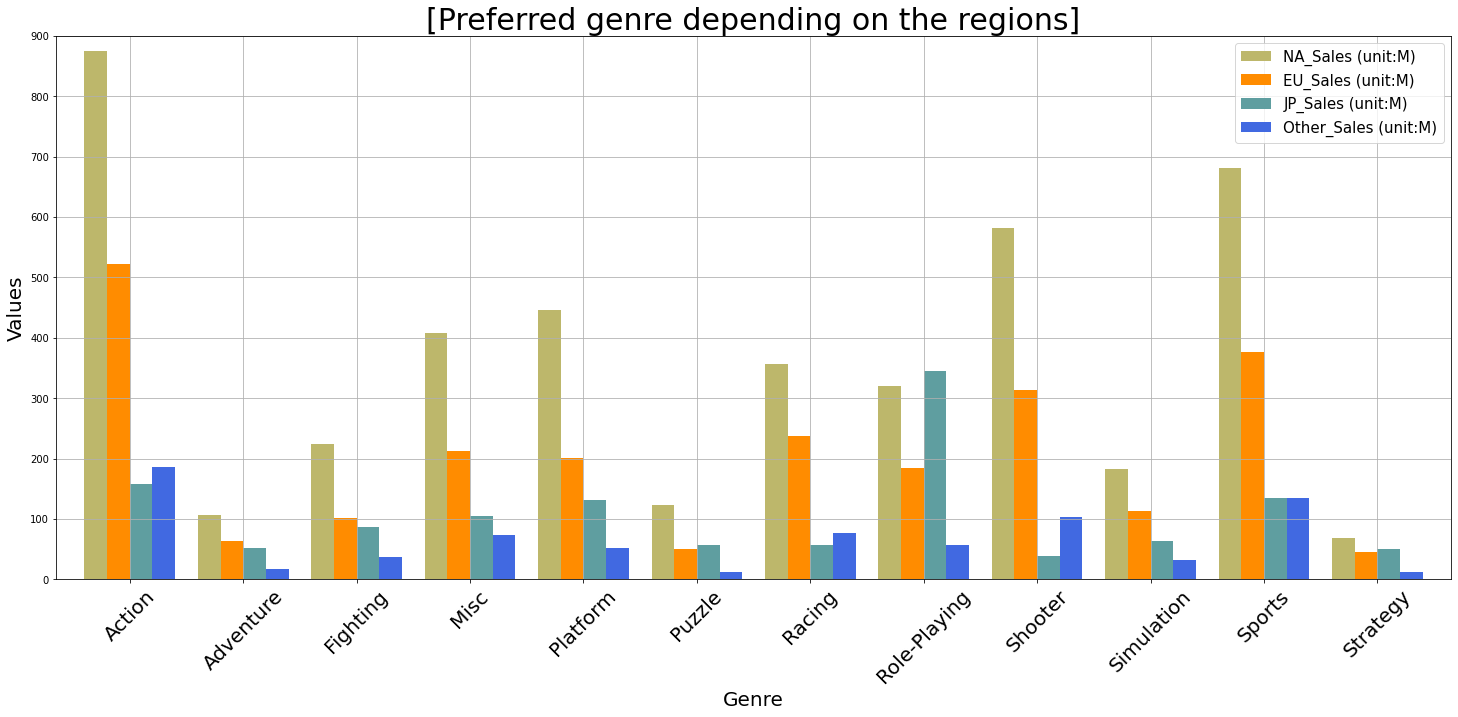

In [ ]:
import matplotlib.pyplot as plt

df1 = df.loc[:,['Genre', 'NA_Sales (unit:M)',	'EU_Sales (unit:M)',	'JP_Sales (unit:M)'	,'Other_Sales (unit:M)']]
df1 = df1.groupby(by=['Genre'], as_index = True).sum()

colors = ['darkkhaki', 'darkorange', 'cadetblue','royalblue']

df1.plot.bar(rot=0,width=0.8,figsize=(25,10), color = colors)

plt.title("[Preferred genre depending on the regions]",  fontsize=30)
plt.xlabel("Genre",fontsize = 20)
plt.ylabel("Values",fontsize = 20)
plt.legend(loc=1,fontsize = 15)
plt.ylim(0,900)
plt.xticks(rotation=45, fontsize = 20)
plt.grid()
plt.show()

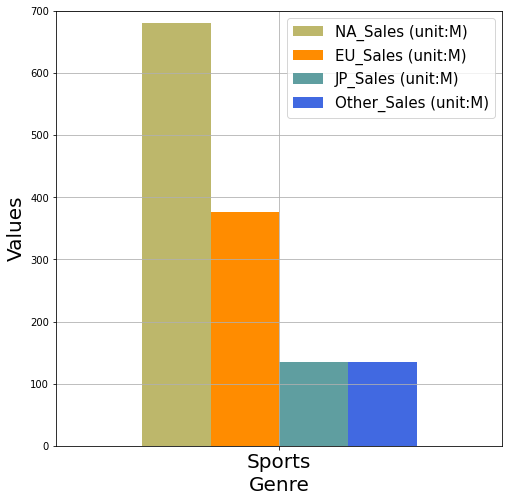

In [ ]:
pdf = df.loc[:,['Genre', 'NA_Sales (unit:M)',	'EU_Sales (unit:M)',	'JP_Sales (unit:M)'	,'Other_Sales (unit:M)']]
pdf = pdf[pdf['Genre']== 'Sports']
pdf = pdf.groupby(by=['Genre'], as_index = True).sum()

colors = ['darkkhaki', 'darkorange', 'cadetblue','royalblue']

pdf.plot.bar(rot=0,width=0.8,figsize=(8,8), color = colors)

# plt.title("[Preferred genre depending on the regions]",  fontsize=30)
plt.xlabel("Genre",fontsize = 20)
plt.ylabel("Values",fontsize = 20)
plt.legend(loc=1,fontsize = 15)
plt.ylim(0,700)
plt.xticks(fontsize = 20)
plt.grid()
plt.show()

# 1-2. 지역별 **Wii게임** 내 스포츠 장르 출고량 

In [ ]:
import matplotlib.pyplot as plt

ddd = df.loc[:,['Genre', 'Platform','NA_Sales (unit:M)',	'EU_Sales (unit:M)',	'JP_Sales (unit:M)'	,'Other_Sales (unit:M)']]
ddd = ddd[ddd['Platform']== 'Wii']
ddd = ddd[ddd['Genre']== 'Sports']
ddd

ddd1 = ddd.groupby(by=['Genre'], as_index = True).sum()
ddd1

,NA_Sales (unit:M),EU_Sales (unit:M),JP_Sales (unit:M),Other_Sales (unit:M)
Genre,,,,
Sports,151.77,94.99,18.25,27.06


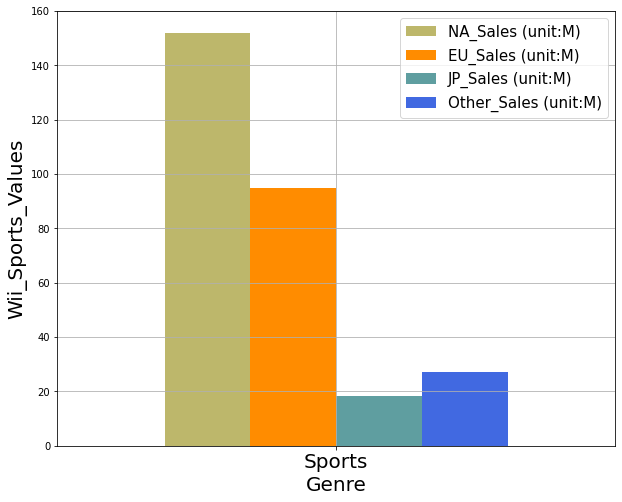

In [ ]:
colors = ['darkkhaki', 'darkorange', 'cadetblue','royalblue']

ddd1.plot.bar(rot=0,width=0.8,figsize=(10,8), color = colors)

# plt.title("[Preferred genre depending on the regions]",  fontsize=30)
plt.xlabel("Genre",fontsize = 20)
plt.ylabel("Wii_Sports_Values",fontsize = 20)
plt.legend(loc=1,fontsize = 15)
plt.ylim(0,160)
plt.xticks(fontsize = 20)
plt.grid()
plt.show()

# **2. 연도별 게임 장르의 트렌드는 어떻게 될까?**

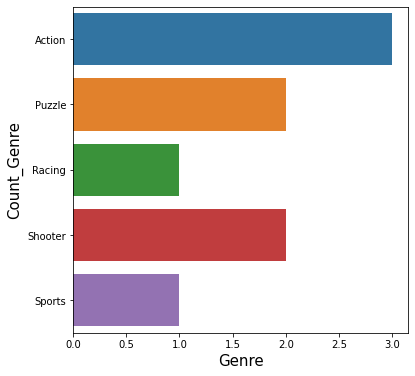

In [ ]:
# 1970s Game genre popularity

df2 = df.iloc[:,2:4]
df2.dropna(inplace=True)

d_f_1970s = df2.query('Year < 1980' )
d_f_1970s = pd.crosstab(d_f_1970s.Year,d_f_1970s.Genre).sum()
d_f_1970s = pd.DataFrame(d_f_1970s, columns = ['1970s'])

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

sns.barplot(data=d_f_1970s, y=d_f_1970s.index,x=d_f_1970s['1970s'])

plt.ylabel("Count_Genre",fontsize = 15)
plt.xlabel("Genre",fontsize = 15)
plt.xticks(rotation=0, fontsize = 10)
plt.show();

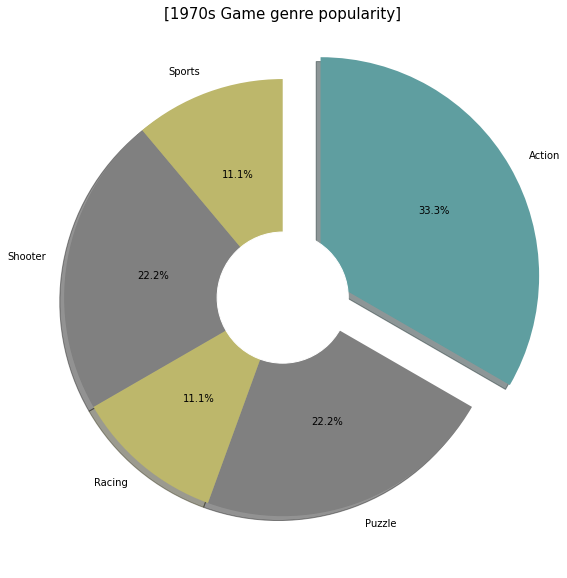

In [ ]:
# 1970s Game genre popularity

Y_1970s = d_f_1970s['1970s'].tolist()
label1 = d_f_1970s.index.tolist()

exp1 = [0.2,0,0.,0,0]

colors = ['cadetblue','grey','darkkhaki','grey','darkkhaki']
plt.figure(figsize=(8,8))

centre_circle = plt.Circle((0,0),0.3,color='white')
plt.gca().add_artist(centre_circle)

plt.pie(Y_1970s, labels=label1, autopct='%.1f%%',startangle=90, counterclock=False, explode=exp1,  colors=colors,shadow=True)
plt.tight_layout()
plt.title('[1970s Game genre popularity]', fontsize=15) 
plt.show()

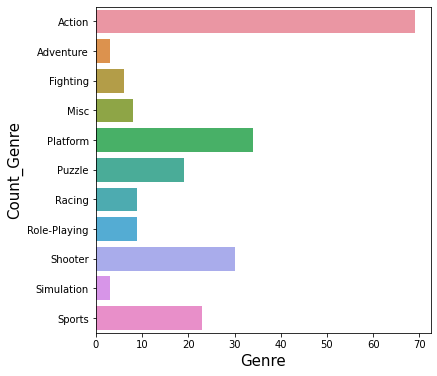

In [ ]:
# 1980s Game genre popularity

d_f_1980s = df2.query('1980 <= Year < 1990' )
d_f_1980s = pd.crosstab(d_f_1980s.Year,d_f_1980s.Genre).sum()
d_f_1980s = pd.DataFrame(d_f_1980s, columns = ['1980s'])

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

sns.barplot(data=d_f_1980s, y=d_f_1980s.index, x=d_f_1980s['1980s'])

plt.ylabel("Count_Genre",fontsize = 15)
plt.xlabel("Genre",fontsize = 15)
plt.xticks(rotation=0, fontsize = 10)
plt.show();

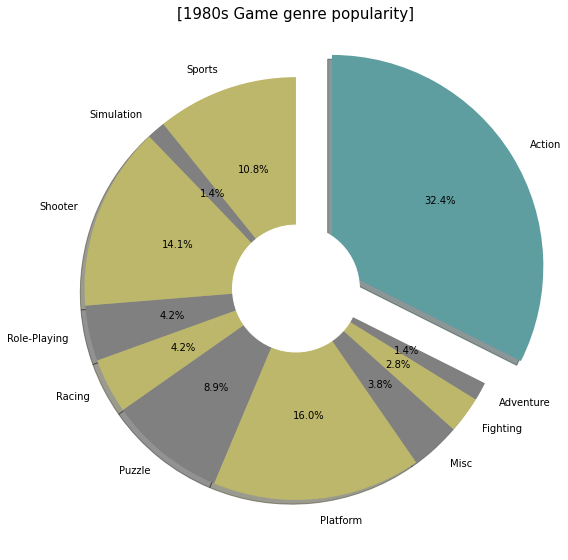

In [ ]:
# 1980s Game genre popularity
Y_1980s = d_f_1980s['1980s'].tolist()
label2 = d_f_1980s.index.tolist()

exp2 = [0.2,0,0.,0,0,0,0,0,0,0,0]

plt.figure(figsize=(8,8))

colors = ['cadetblue','grey','darkkhaki','grey','darkkhaki','grey','darkkhaki','grey','darkkhaki','grey','darkkhaki']

centre_circle = plt.Circle((0,0),0.3,color='white')
plt.gca().add_artist(centre_circle)

plt.pie(Y_1980s, labels=label2, autopct='%.1f%%',startangle=90, counterclock=False, explode=exp2, colors = colors,shadow=True)
plt.tight_layout()
plt.title('[1980s Game genre popularity]', fontsize=15) 
plt.show()

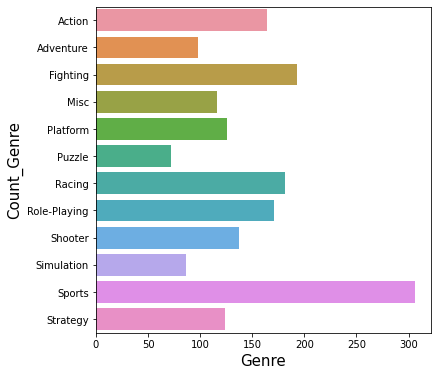

In [ ]:
# 1990s Game genre popularity

d_f_1990s = df2.query('1990 <= Year < 2000' )
d_f_1990s = pd.crosstab(d_f_1990s.Year,d_f_1990s.Genre).sum()
d_f_1990s = pd.DataFrame(d_f_1990s, columns = ['1990s'])


fig, ax = plt.subplots()
fig.set_size_inches(6,6)

sns.barplot(data=d_f_1990s, y=d_f_1990s.index, x=d_f_1990s['1990s'])

plt.ylabel("Count_Genre",fontsize = 15)
plt.xlabel("Genre",fontsize = 15)
plt.xticks(rotation=0, fontsize = 10)
plt.show();

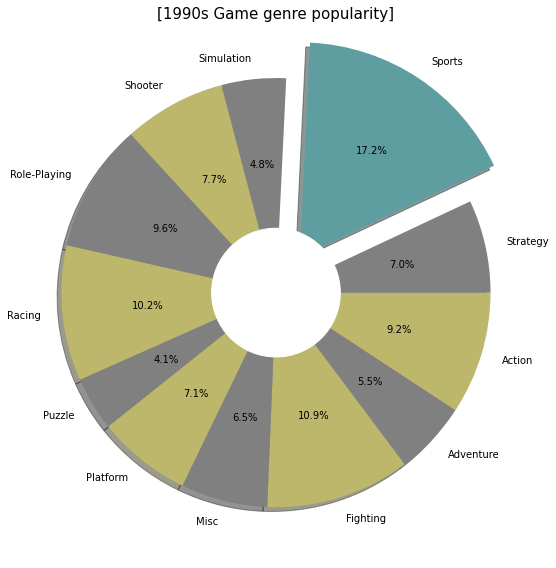

In [ ]:
# 1990s Game genre popularity

Y_1990s = d_f_1990s['1990s'].tolist()
label3 = d_f_1990s.index.tolist()

exp3 = [0,0,0,0,0,0,0,0,0,0,0.2,0]

# colors = ['darkkhaki', 'darkorange', 'lightcoral', 'cadetblue','royalblue','limegreen','lavender','gold','grey','rosybrown','plum','lightskyblue']
colors = ['darkkhaki', 'grey','darkkhaki', 'grey','darkkhaki', 'grey','darkkhaki', 'grey','darkkhaki', 'grey','cadetblue','grey']


plt.figure(figsize=(8,8))

centre_circle = plt.Circle((0,0),0.30,color='white')
plt.gca().add_artist(centre_circle)

plt.pie(Y_1990s, labels=label3, autopct='%.1f%%',startangle=360, counterclock=False, explode=exp3, colors = colors,shadow=True)
plt.title('[1990s Game genre popularity]', fontsize=15) 
plt.tight_layout()
plt.show()

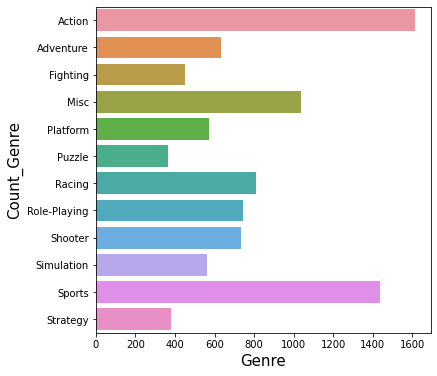

In [ ]:
#2000s Game genre popularity

d_f_2000s = df2.query('2000 <= Year < 2010' )
d_f_2000s = pd.crosstab(d_f_2000s.Year,d_f_2000s.Genre).sum()
d_f_2000s = pd.DataFrame(d_f_2000s, columns = ['2000s'])

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

sns.barplot(data=d_f_2000s, y=d_f_2000s.index, x=d_f_2000s['2000s'])

plt.ylabel("Count_Genre",fontsize = 15)
plt.xlabel("Genre",fontsize = 15)
plt.xticks(rotation=0, fontsize = 10)
plt.show();

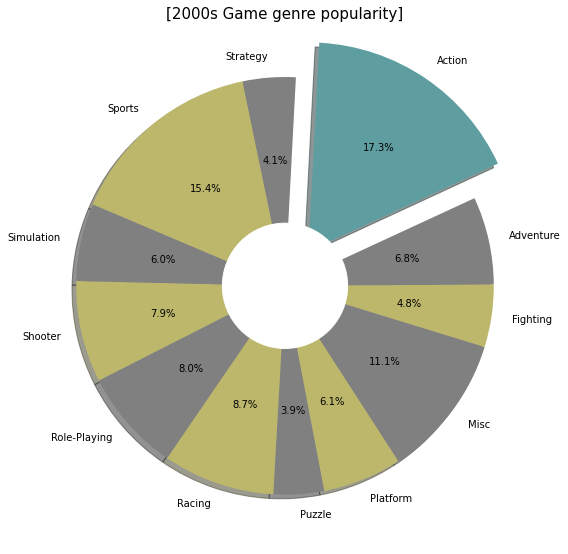

In [ ]:
#2000s Game genre popularity


Y_2000s = d_f_2000s['2000s'].tolist()
label4 = d_f_2000s.index.tolist()

exp4 = [0.2,0,0,0,0,0,0,0,0,0,0.0,0]

plt.figure(figsize=(8,8))

colors = ['cadetblue','grey','darkkhaki', 'grey','darkkhaki', 'grey','darkkhaki', 'grey','darkkhaki', 'grey','darkkhaki','grey']

centre_circle = plt.Circle((0,0),0.30,color='white')
plt.gca().add_artist(centre_circle)

plt.pie(Y_2000s, labels=label4, autopct='%.1f%%',startangle=87, counterclock=False, explode=exp4, colors=colors,shadow=True)
plt.tight_layout()
plt.title('[2000s Game genre popularity]', fontsize=15) 
plt.show()

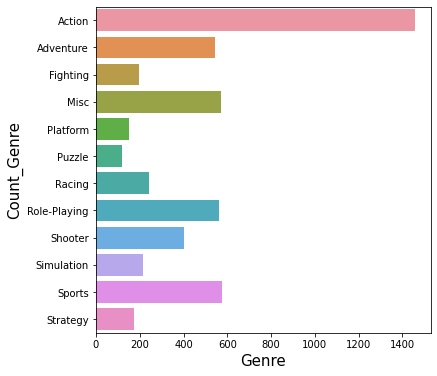

In [ ]:
# 2010s Game genre popularity(2020년 제외) 
d_f_2010s = df2.query('2010 <= Year < 2020' )
d_f_2010s = pd.crosstab(d_f_2010s.Year,d_f_2010s.Genre).sum()
d_f_2010s = pd.DataFrame(d_f_2010s, columns = ['2010s'])
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

sns.barplot(data=d_f_2010s, y=d_f_2010s.index, x=d_f_2010s['2010s'])

plt.ylabel("Count_Genre",fontsize = 15)
plt.xlabel("Genre",fontsize = 15)
plt.xticks(rotation=0, fontsize = 10)
plt.show();

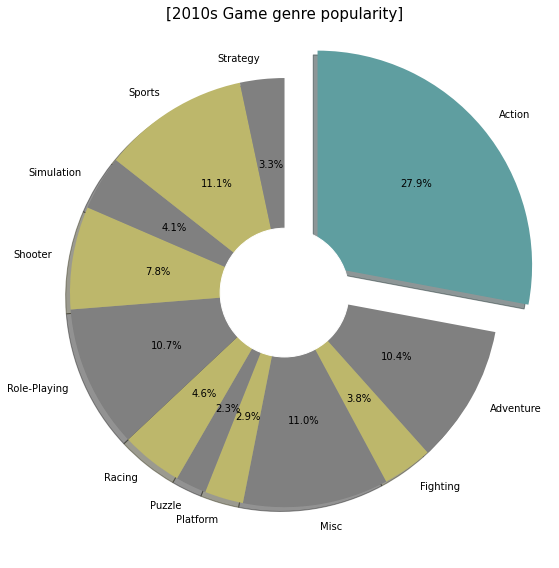

In [ ]:
# 2010s Game genre popularity(2020년 제외) 


Y_2010s = d_f_2010s['2010s'].tolist()
label5 = d_f_2010s.index.tolist()

exp5 = [0.2,0,0,0,0,0,0,0,0,0,0.0,0]

plt.figure(figsize=(8,8))

colors = ['cadetblue','grey','darkkhaki', 'grey','darkkhaki', 'grey','darkkhaki', 'grey','darkkhaki', 'grey','darkkhaki','grey']

centre_circle = plt.Circle((0,0),0.30,color='white')
plt.gca().add_artist(centre_circle)

plt.pie(Y_2010s, labels=label5, autopct='%.1f%%',startangle=90, counterclock=False, explode=exp5, colors = colors,shadow=True) 
plt.title('[2010s Game genre popularity]', fontsize=15) 
plt.tight_layout()
plt.show()

# ***3. 출고량 가장 많은 게임 분석***

* 전 지역 출고량기준, 가장 출고량이 많은
Wii Sports 게임 분석

In [ ]:
# 각 지역의 Wii Sports 출고량 조사

wii = df[df['Platform'] == 'Wii']
wii = wii.loc[:,['Name','NA_Sales (unit:M)','EU_Sales (unit:M)','JP_Sales (unit:M)','Other_Sales (unit:M)']]
wii2 = wii[wii['Name'] == 'Wii Sports']
wii2.set_index('Name', drop=True, inplace=True)
wii2

,NA_Sales (unit:M),EU_Sales (unit:M),JP_Sales (unit:M),Other_Sales (unit:M)
Name,,,,
Wii Sports,41.49,29.02,3.77,8.46


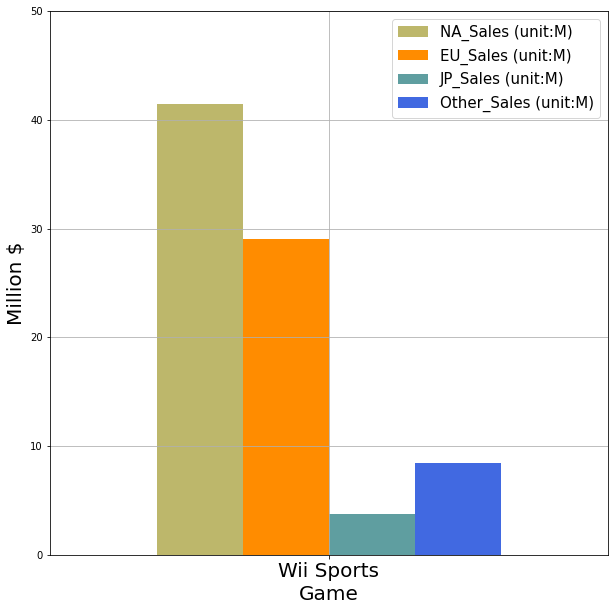

In [ ]:
# 각 지역의 Wii Sports 출고량 시각화

wii2.plot.bar(width=0.8,figsize=(10,10), color = colors)

plt.ylabel("Million $",fontsize = 20)
plt.xlabel("Game",fontsize = 20)
plt.legend(loc=1,fontsize = 15)
plt.ylim(0,50)
plt.xticks(rotation=0, fontsize = 20)
plt.grid()
plt.show()

# **4. 어떤 장르를 선택해야 할까?**

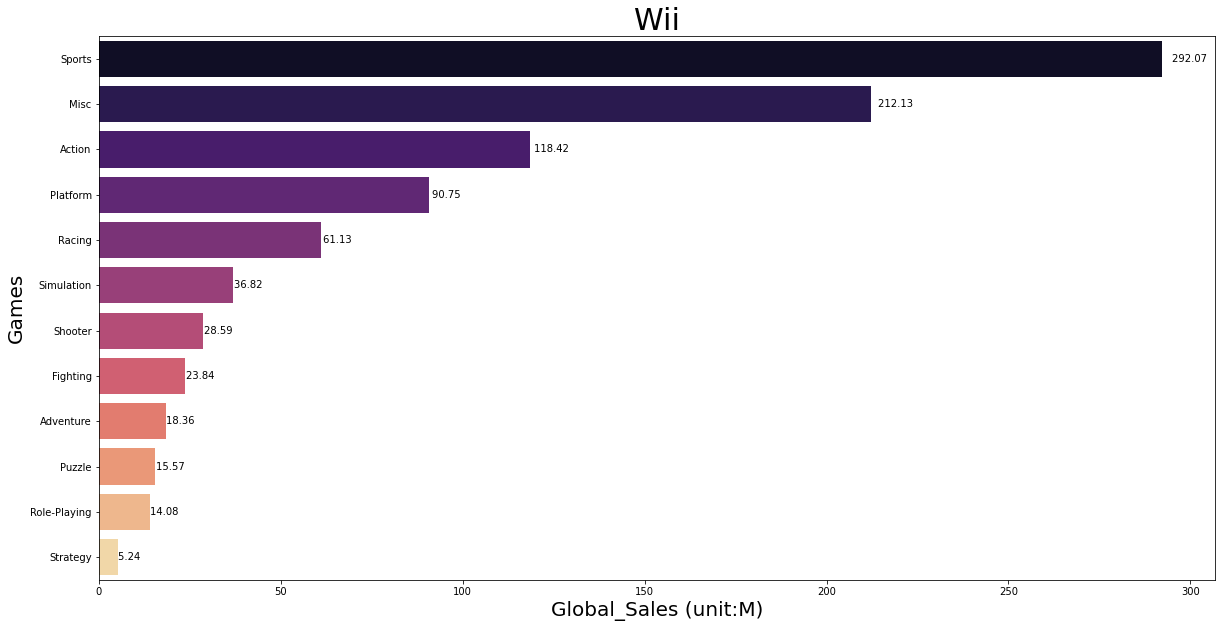

In [ ]:
# Wii 플랫폼 내 장르별 출고량 조사 및 시각화

plt_wii = df[df['Platform'] == 'Wii']
plt_wii = plt_wii.loc[:,['Genre','Global_Sales (unit:M)']]
plt_wii.reset_index(drop=True, inplace=True)
plt_wii = plt_wii.groupby(by=['Genre'],as_index=True).sum()
plt_wii = plt_wii.sort_values(by = 'Global_Sales (unit:M)',ascending=False)

plt.figure(figsize=(20,10))
ax = sns.barplot(data=plt_wii, y = plt_wii.index, x=plt_wii['Global_Sales (unit:M)'], palette='magma')
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.2f "%(width), va='center')

plt.xlabel('Global_Sales (unit:M)',fontsize = 20)
plt.ylabel("Games",fontsize = 20)    
plt.title('Wii', fontsize=30);

# **5. 어떤 플랫폼을 선택해야할까?**

In [ ]:
dff = df.loc[:,['Platform','Year']]
dff1 = dff.query('2000 <= Year < 2020')
dff2 = pd.crosstab(dff1.Platform,dff1.Year).T
dff2

Platform,2600,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
2000.0,0,0,20,0,17,1,1,61,7,161,82,0,0,0,0,2,0,0,0,1,0
2001.0,0,0,8,0,10,108,22,9,15,93,186,0,0,0,0,2,0,0,0,36,0
2002.0,0,0,1,0,0,199,154,1,19,20,292,0,0,0,0,0,0,0,0,165,0
2003.0,0,0,0,0,0,151,152,0,33,3,258,0,0,0,0,0,0,0,0,190,0
2004.0,0,0,0,23,0,177,84,1,31,0,263,0,0,15,0,0,0,0,0,181,0
2005.0,0,0,0,119,0,138,98,0,37,0,265,0,0,97,0,0,1,0,20,182,0
2006.0,0,0,0,205,0,40,41,0,52,0,264,28,0,193,0,0,48,0,95,63,0
2007.0,0,0,1,381,0,6,4,0,63,0,217,92,0,135,0,0,191,0,124,4,0
2008.0,0,0,1,498,0,0,0,0,78,0,191,143,0,105,1,0,287,0,150,1,0


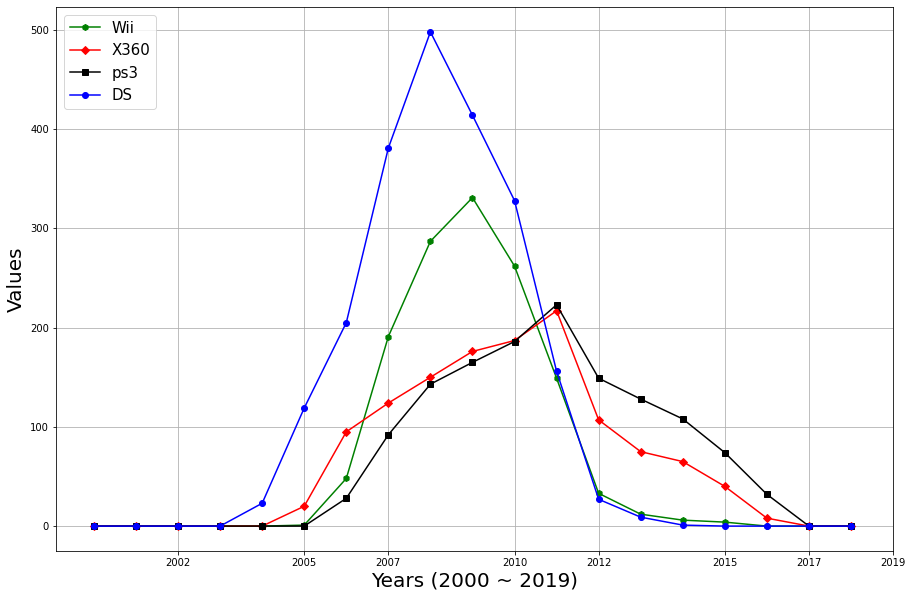

In [ ]:
wii = dff2['Wii'].tolist()
X360 = dff2['X360'].tolist()
ps3 = dff2['PS3'].tolist()
ds  = dff2['DS'].tolist()

years = dff2.index.tolist()

plt.figure(figsize=(15, 10))

plt.plot(years,wii,color='green',marker="h",label = 'Wii')
plt.plot(years,X360,color='red',marker='D',label = 'X360')
plt.plot(years,ps3,color='black',marker='s',label = 'ps3')
plt.plot(years,ds,color='blue',marker="o",label = 'DS')

plt.legend(loc=2, fontsize=15)

plt.xticks([2002,2005,2007,2010,2012,2015,2017,2019])
plt.xlabel("Years (2000 ~ 2019)",fontsize = 20)
plt.ylabel("Values",fontsize = 20)
plt.grid()
plt.show();

# **6. 어떤 지역을 선택해야할까?**

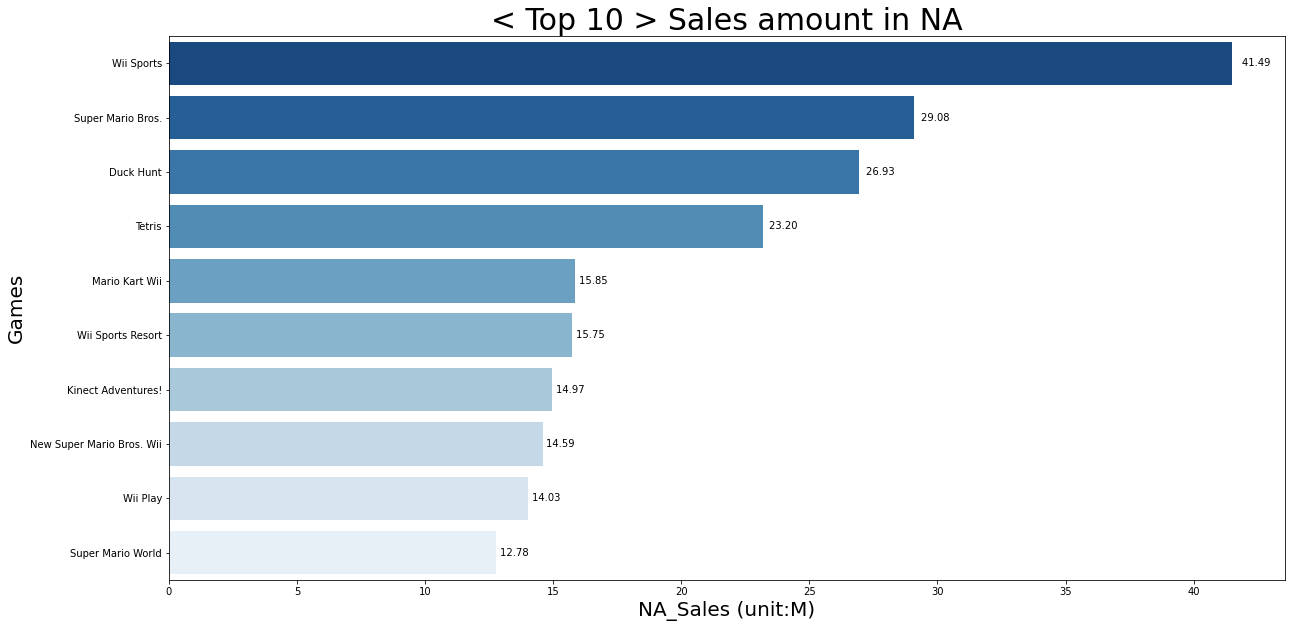

In [ ]:
# NA_Sales Top 10
import seaborn as sns

df_NA = df.loc[:,['Name', 'NA_Sales (unit:M)']]
df_NA.set_index('Name', inplace=True)
df_NA.sort_values(by=['NA_Sales (unit:M)'],axis=0,ascending=False,inplace=True)
df_NA = df_NA.nlargest(10,'NA_Sales (unit:M)')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_NA, y = df_NA.index, x = df_NA['NA_Sales (unit:M)'], palette='Blues_r')

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.2f "%(width), va='center')

plt.xlabel("NA_Sales (unit:M)",fontsize = 20)
plt.ylabel("Games",fontsize = 20)
plt.title('< Top 10 > Sales amount in NA', fontsize=30)
plt.show();

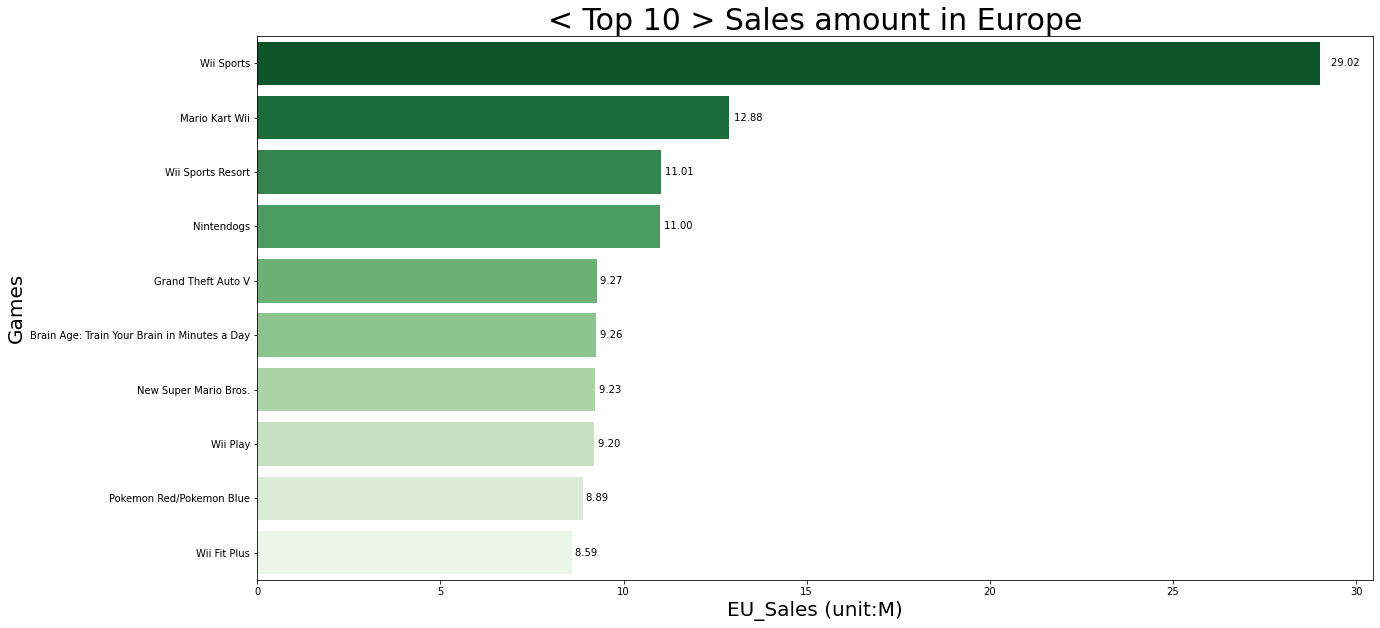

In [ ]:
# EU_Sales Top 10
df_EU = df.loc[:,['Name', 'EU_Sales (unit:M)']]
df_EU.set_index('Name', inplace=True)
df_EU.sort_values(by=['EU_Sales (unit:M)'],axis=0,ascending=False,inplace=True)
df_EU = df_EU.nlargest(10,'EU_Sales (unit:M)')


plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_EU, y = df_EU.index, x=df_EU['EU_Sales (unit:M)'], palette='Greens_r')

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.2f "%(width), va='center')

plt.xlabel("EU_Sales (unit:M)",fontsize = 20)
plt.ylabel("Games",fontsize = 20)
plt.title('< Top 10 > Sales amount in Europe', fontsize=30);

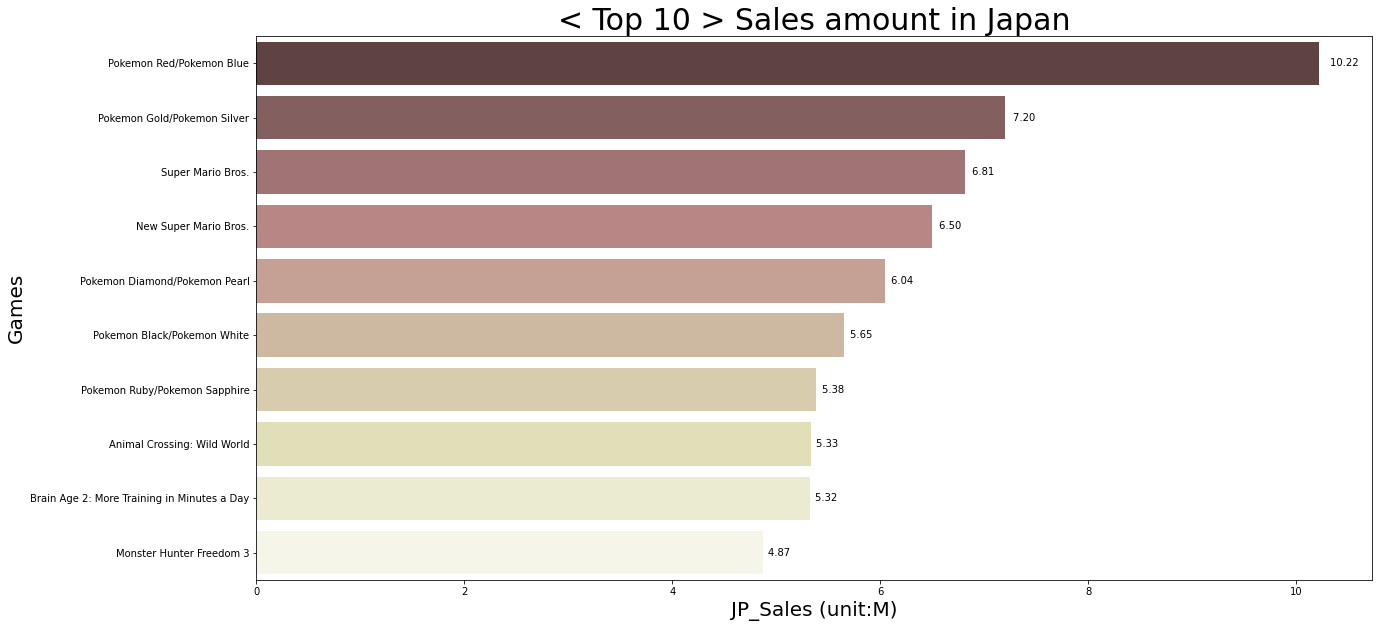

In [ ]:
# JP_Sales Top 10
df_JP = df.loc[:,['Name', 'JP_Sales (unit:M)']]
df_JP.set_index('Name', inplace=True)
df_JP.sort_values(by=['JP_Sales (unit:M)'	],axis=0,ascending=False,inplace=True)
df_JP = df_JP.nlargest(10,'JP_Sales (unit:M)')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_JP, y = df_JP.index, x=df_JP['JP_Sales (unit:M)'], palette='pink')
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.2f "%(width), va='center')

plt.xlabel("JP_Sales (unit:M)",fontsize = 20)
plt.ylabel("Games",fontsize = 20)
plt.title('< Top 10 > Sales amount in Japan', fontsize=30);

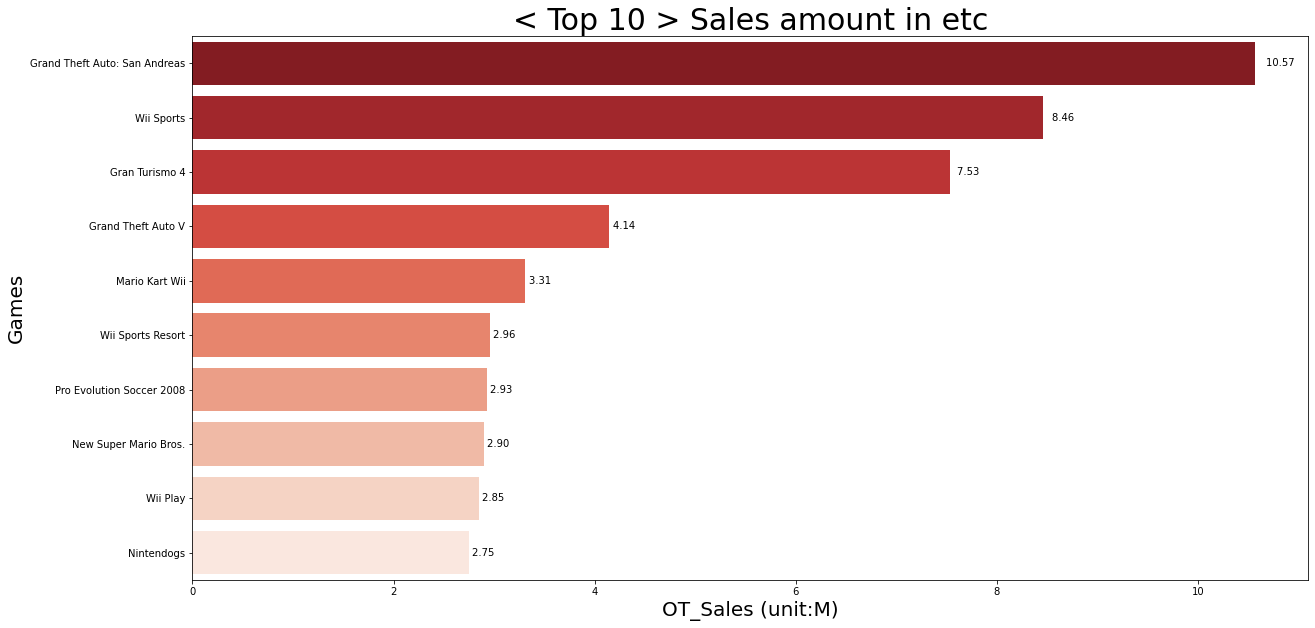

In [ ]:
# Other_Sales Top10
df_OT = df.loc[:,['Name', 'Other_Sales (unit:M)']]
df_OT.set_index('Name', inplace=True)
df_OT.sort_values(by=['Other_Sales (unit:M)'],axis=0,ascending=False,inplace=True)
df_OT = df_OT.nlargest(10,'Other_Sales (unit:M)')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_OT, y = df_OT.index, x=df_OT['Other_Sales (unit:M)'], palette='Reds_r')
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.2f "%(width), va='center')

plt.xlabel("OT_Sales (unit:M)",fontsize = 20)
plt.ylabel("Games",fontsize = 20)    
plt.title('< Top 10 > Sales amount in etc', fontsize=30);